[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/danielmlow/construct-tracker/blob/main/tutorials/suicide_risk_lexicon.ipynb)



# Load and extract Suicide Risk Lexicon and then compute similarities to avoid missing similar tokens

Lexicon validated by clincians with expertise in suicide research


In [1]:
# On colab, we need to install these version of numpy and pandas and Restart the session when prompted. 
!pip install numpy==1.24.4 pandas==1.5.3

In [1]:
!pip install -q construct-tracker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.4 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from construct_tracker import lexicon

In [5]:
srl = lexicon.load_lexicon(name = 'srl_v1-0')
srl_prototypes = lexicon.load_lexicon(name = 'srl_prototypes_v1-0')


Just highly prototypical ones?

```python
srl_prototypes = lexicon.load_lexicon(name = 'srl_prototypes_v1-0')
```

In [6]:
# load reddit posts and count

reddit_df = pd.read_csv('https://mair.sites.fas.harvard.edu/datasets/rmhd_27subreddits_1300posts_train.csv', index_col = 0)
reddit_df

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,EDAnonymous,lillylourose,2018/11/28,"The reason why I stoped with eating? Well, for...",0.478964,2.747789,2.109524,95.205000,86.583333,4.761905,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
1,EDAnonymous,tinyTRONgirl,2019/10/15,I’m freaking out WHY can’t my body just digest...,5.559945,5.475852,6.247874,80.769913,67.394161,8.309854,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.131764,0.000000,0.00000,0.0
2,EDAnonymous,Vetmyana,2019/07/02,Tw weight loss achievement Just lost 8lbs (wei...,2.546452,4.004821,3.520194,91.910290,75.451613,4.960000,...,0.0,0.254812,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,EDAnonymous,Fastingcametome,2019/07/25,When not eating is your solution to everything...,0.836122,2.859536,2.359891,95.598204,82.741497,5.824762,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.145753,0.00000,0.0
4,EDAnonymous,bananamo7,2019/04/19,How to dedicate a long weekend to beginning re...,5.119444,6.724697,6.719444,70.932500,69.185185,10.585185,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28075,unitedkingdom,Anomalous-Entity,2019/05/07,When someone is having a go at the U.S. and ma...,1.758324,4.527215,4.326374,77.275769,88.038462,6.048352,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.258879,0.000000,0.00000,0.0
28076,unitedkingdom,Squigglish,2019/03/28,My MP voted against every single Indicative Mo...,6.098205,9.032098,6.976923,52.759744,104.384615,7.887179,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
28077,unitedkingdom,javaxcore,2019/09/02,What is Order 66? I have heard much talk of th...,0.761500,2.701924,1.290000,103.625000,82.500000,4.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
28078,unitedkingdom,AlwaysGoForAusInRisk,2019/05/13,Seeing the GB Ambassador for Denmark today at ...,8.632452,8.773091,9.139258,61.853071,60.968504,12.296513,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [7]:
reddit_df.groupby('subreddit').count()['author']

subreddit
EDAnonymous          1040
ForeverAlone         1040
UKPersonalFinance    1040
addiction            1040
adhd                 1040
alcoholism           1040
anxiety              1040
autism               1040
bipolarreddit        1040
bpd                  1040
conspiracy           1040
depression           1040
divorce              1040
guns                 1040
healthanxiety        1040
legaladvice          1040
lonely               1040
mentalhealth         1040
mindfulness          1040
personalfinance      1040
ptsd                 1040
schizophrenia        1040
socialanxiety        1040
suicidewatch         1040
teaching             1040
ukpolitics           1040
unitedkingdom        1040
Name: author, dtype: int64

Let's just look at 4 subreddits

In [8]:
reddit_df_mini = reddit_df[reddit_df['subreddit'].isin(['anxiety','bpd','depression','suicidewatch'])]

In [9]:

toy = True # First try running on a subset of documents

if toy:
	# Sample a subset and obtain documents column
	reddit_df_mini = reddit_df_mini.sample(n=20, random_state=42)
	documents = reddit_df_mini['post'].values
	subreddits = reddit_df_mini['subreddit'].values
	print(len(documents))






20


## 1. Count tokens using lexicon

In [10]:
# Now count whether tokens appear in document:
# About 75 sec for 4160 reddits posts

load = False

save_dir = './data/feature_extraction/reddit/'

if load:
	counts = pd.read_csv(save_dir+'suicide_risk_lexicon_counts.csv')
	counts['subreddit'] = reddit_df_mini['subreddit'].values
	with open(save_dir+'suicide_risk_lexicon_matches_construct2doc.json', 'r') as json_file:
		matches_construct2doc  = json.load(json_file)

	# Can do the same for matches_by_construct, matches_doc2construct

else:
	counts, matches_by_construct, matches_doc2construct, matches_construct2doc  = srl.extract(documents,
																						normalize = False,
																						save_dir = save_dir
																						)
	counts['subreddit'] = reddit_df_mini['subreddit'].values
	display(counts)



extracting... 


100%|██████████| 50/50 [00:00<00:00, 564.58it/s]


,document_id,document,Passive suicidal ideation,Active suicidal ideation & suicidal planning,Lethal means for suicide,Direct self-injury,Suicide exposure,Other suicidal language,Hospitalization,Loneliness & isolation,...,Physical health issues & disability,Incarceration,Poverty & homelessness,Gender & sexual identity,Discrimination,Finances & work stress,Barriers to treatment,Mental health treatment,word_count,subreddit
0,0,Is it life really worth living? I finished col...,1,1,0,0,0,2,0,2,...,0,0,0,0,0,2,0,0,200,suicidewatch
1,1,I’m broken and unlovable I spent the first 17 ...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,142,suicidewatch
2,2,Anxiety about my brain My panic attacks come i...,0,0,0,0,0,1,0,0,...,2,0,0,0,0,0,0,1,73,anxiety
3,3,Scared of my own thoughts I was listening to m...,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,42,depression
4,4,I'm not going to kill myself today. Not today.,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,depression
5,5,Really scared to lose my FP. Am I overreacting...,0,0,0,0,0,0,0,3,...,0,0,0,1,0,1,0,0,400,bpd
6,6,Been through this a few times. The time is nea...,0,0,2,0,0,1,0,0,...,1,0,0,0,0,1,0,0,108,suicidewatch
7,7,Trying to pull together Sometimes I feel like ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,75,suicidewatch
8,8,Couch vs Bed Is it just me or do other people ...,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,68,depression
9,9,What are some things I can do to be supportive...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,86,depression


## 2. Construct-text similarity find similar tokens to the one in the lexicon

In the example, below, for each construct, you get a score of or more if its found exactly by the lexicon. and if not, it computes the maximum of the cosine similarities between lexicon token (their embeddings) and sentence embeddings within a document. It removes cosine similarities below 0.3 (should adjust if using other embeedding besides all-MiniLM-L6-v2)

From Low et al. (2025). Text Psychometrics. 
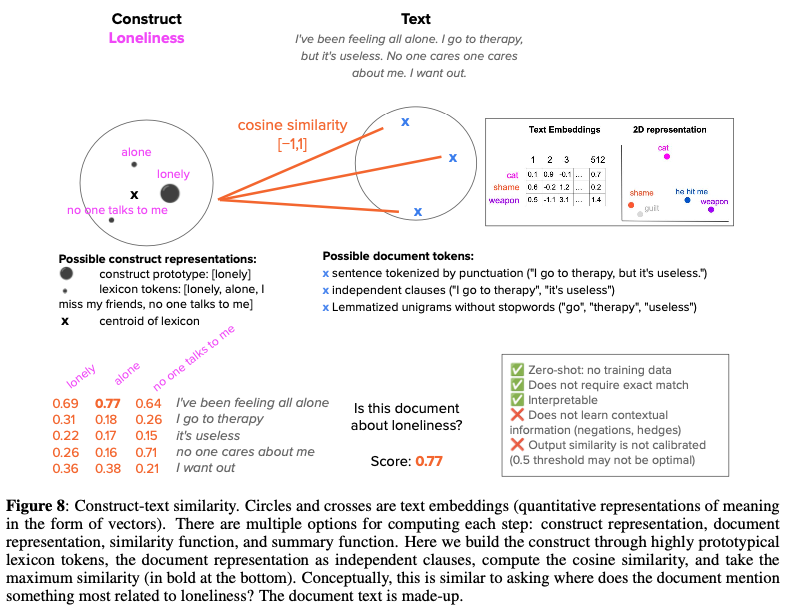


In [11]:
from construct_tracker import cts

In [12]:


# config
# ============================================================
construct_representation = 'lexicon' 
document_representation = 'sentence' # sentence: compute similarity between each token in a lexicon and each sentence in a document
embedding_type = 'sentence'
embedding_model = 'all-MiniLM-L6-v2'

In [13]:
# we'll use only the tokens that clinicians rated 3/3 on prototypicality (i.e., how obviously the token is an expression of the construct)  
lexicon_dict = {}
for c in srl_prototypes.constructs:
    lexicon_dict[c] = srl_prototypes.constructs[c]["tokens"]

Arguments for cts.measure:

https://github.com/danielmlow/construct-tracker/blob/main/src/construct_tracker/cts.py

In [15]:
import time

start = time.time()
feature_vectors_lc, cosine_scores_docs_lc = cts.measure(lexicon_dict,
		documents,
		construct_representation = construct_representation,
		document_representation = document_representation,
		count_if_exact_match = 'replace', # 'replace' returns count from lexicon(positive int replaces cosine similarity)        
        lexicon_counts = counts, # if this is None, it will be extracted
        similarity_threshold = 0.3,
        
		)

end = time.time()
print(end - start)

INFO: 
INFO: Default input sequence length for all-MiniLM-L6-v2: 256
INFO: Using default device
INFO: Encoding 1523 new construct tokens...
Batches: 100%|██████████| 48/48 [00:01<00:00, 44.84it/s]
INFO: Saving lexicon token embeddings here: ./data/embeddings/all-MiniLM-L6-v2.pickle
INFO: Tokenizing documents...
INFO: Encoding all document tokens...
Encoding batches: 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]
INFO: computing similarity between 50 constructs and 20 documents...
Processing documents: 20it [00:00, 70.04it/s]

3.038766860961914


In [16]:
feature_vectors_lc

,document,documents_tokenized,Active suicidal ideation & suicidal planning_max,Lethal means for suicide_max,Direct self-injury_max,Suicide exposure_max,Other suicidal language_max,Hospitalization_max,Loneliness & isolation_max,Social withdrawal_max,...,Borderline Personality Disorder_max,Eating disorders_max,Physical health issues & disability_max,Incarceration_max,Poverty & homelessness_max,Gender & sexual identity_max,Discrimination_max,Finances & work stress_max,Barriers to treatment_max,Mental health treatment_max
0,Is it life really worth living? I finished col...,"[Is it life really worth living?, I finished c...",1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.419804,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.314567,0.000000
1,I’m broken and unlovable I spent the first 17 ...,[I’m broken and unlovable I spent the first 17...,0.372455,0.357498,0.347212,0.357297,0.364372,0.306692,1.000000,0.395118,...,0.359419,0.000000,0.423766,0.000000,0.000000,0.000000,0.000000,0.000000,0.387718,0.427450
2,Anxiety about my brain My panic attacks come i...,[Anxiety about my brain My panic attacks come ...,0.318709,0.351108,0.351108,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.313254,0.371703,1.000000
3,Scared of my own thoughts I was listening to m...,[Scared of my own thoughts I was listening to ...,1.000000,1.000000,1.000000,0.507007,0.443123,0.000000,0.392372,0.420009,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.467615,0.000000
4,I'm not going to kill myself today. Not today.,"[I'm not going to kill myself today., Not today.]",1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.567261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Really scared to lose my FP. Am I overreacting...,"[Really scared to lose my FP., Am I overreacti...",0.450523,0.394967,0.394967,0.000000,0.365149,0.000000,3.000000,0.361857,...,7.000000,0.310696,0.000000,0.000000,0.364154,1.000000,0.317845,1.000000,0.540480,0.482694
6,Been through this a few times. The time is nea...,"[Been through this a few times., The time is n...",0.399070,2.000000,0.000000,0.417415,1.000000,0.000000,0.316009,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.433506,0.454348
7,Trying to pull together Sometimes I feel like ...,"[Trying to pull together, Sometimes I feel lik...",0.411099,0.411099,0.390192,0.000000,0.360104,0.000000,0.724934,0.399884,...,0.346128,0.000000,0.312047,0.000000,0.000000,0.317554,0.000000,1.000000,0.388061,0.308117
8,Couch vs Bed Is it just me or do other people ...,[Couch vs Bed Is it just me or do other people...,0.375144,0.000000,0.000000,0.000000,0.325880,0.330769,2.000000,0.389745,...,0.000000,0.000000,0.589457,0.000000,0.000000,0.000000,0.310004,0.000000,0.526169,0.459947
9,What are some things I can do to be supportive...,[What are some things I can do to be supportiv...,0.500030,0.326157,0.390312,0.332509,0.621343,0.000000,0.487414,0.401680,...,0.000000,0.000000,0.428006,0.000000,0.300114,0.000000,0.000000,0.383609,0.369204,1.000000


In [27]:
# Interpret counts: visualize matches in context  
doc_id = 7
highlight_constructs = ['Anxiety', 'Depressed mood']

documents_tokenized = feature_vectors_lc['documents_tokenized'].values
cosine_similarities = cosine_scores_docs_lc.copy()
# we'll use only the tokens that clinicians rated 3/3 on prototypicality (i.e., how obviously the token is an expression of the construct)  
lexicon_dict = {}
for c in srl.constructs:
    lexicon_dict[c] = srl_prototypes.constructs[c]["tokens"]

for construct in highlight_constructs:
	print(f'Matches for {construct}:')
	most_similar_lexicon_token, most_similar_document_token, highest_similarity = cts.get_highest_similarity_phrase(doc_id, construct, documents, documents_tokenized, cosine_similarities, lexicon_dict)
	print(f'most_similar_lexicon_token: {most_similar_lexicon_token}\nmost_similar_document_token: {most_similar_document_token}\nhighest_similarity: {highest_similarity}')    
    # print(f'{most_similar_lexicon_token} {most_similar_document_token} {highest_similarity}')

	print('=============================')

Matches for Anxiety:
The construct 'Anxiety' through its token 'can't relax' had the highest cosine similarity (0.31) with the following document token:
'Can’t bring myself to tell anyone I still feel this way'


most_similar_lexicon_token: can't relax
most_similar_document_token: Can’t bring myself to tell anyone I still feel this way
highest_similarity: 0.31
Matches for Depressed mood:
The construct 'Depressed mood' through its token 'I feel sad all the time' had the highest cosine similarity (0.47) with the following document token:
'Sometimes I feel like I don’t exist.  '


most_similar_lexicon_token: I feel sad all the time
most_similar_document_token: Sometimes I feel like I don’t exist.  
highest_similarity: 0.47


In [30]:
feature_vectors_lc

,document,documents_tokenized,Active suicidal ideation & suicidal planning_max,Lethal means for suicide_max,Direct self-injury_max,Suicide exposure_max,Other suicidal language_max,Hospitalization_max,Loneliness & isolation_max,Social withdrawal_max,...,Borderline Personality Disorder_max,Eating disorders_max,Physical health issues & disability_max,Incarceration_max,Poverty & homelessness_max,Gender & sexual identity_max,Discrimination_max,Finances & work stress_max,Barriers to treatment_max,Mental health treatment_max
0,Is it life really worth living? I finished col...,"[Is it life really worth living?, I finished c...",1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.419804,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.314567,0.000000
1,I’m broken and unlovable I spent the first 17 ...,[I’m broken and unlovable I spent the first 17...,0.372455,0.357498,0.347212,0.357297,0.364372,0.306692,1.000000,0.395118,...,0.359419,0.000000,0.423766,0.000000,0.000000,0.000000,0.000000,0.000000,0.387718,0.427450
2,Anxiety about my brain My panic attacks come i...,[Anxiety about my brain My panic attacks come ...,0.318709,0.351108,0.351108,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.313254,0.371703,1.000000
3,Scared of my own thoughts I was listening to m...,[Scared of my own thoughts I was listening to ...,1.000000,1.000000,1.000000,0.507007,0.443123,0.000000,0.392372,0.420009,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.467615,0.000000
4,I'm not going to kill myself today. Not today.,"[I'm not going to kill myself today., Not today.]",1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.567261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Really scared to lose my FP. Am I overreacting...,"[Really scared to lose my FP., Am I overreacti...",0.450523,0.394967,0.394967,0.000000,0.365149,0.000000,3.000000,0.361857,...,7.000000,0.310696,0.000000,0.000000,0.364154,1.000000,0.317845,1.000000,0.540480,0.482694
6,Been through this a few times. The time is nea...,"[Been through this a few times., The time is n...",0.399070,2.000000,0.000000,0.417415,1.000000,0.000000,0.316009,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.433506,0.454348
7,Trying to pull together Sometimes I feel like ...,"[Trying to pull together, Sometimes I feel lik...",0.411099,0.411099,0.390192,0.000000,0.360104,0.000000,0.724934,0.399884,...,0.346128,0.000000,0.312047,0.000000,0.000000,0.317554,0.000000,1.000000,0.388061,0.308117
8,Couch vs Bed Is it just me or do other people ...,[Couch vs Bed Is it just me or do other people...,0.375144,0.000000,0.000000,0.000000,0.325880,0.330769,2.000000,0.389745,...,0.000000,0.000000,0.589457,0.000000,0.000000,0.000000,0.310004,0.000000,0.526169,0.459947
9,What are some things I can do to be supportive...,[What are some things I can do to be supportiv...,0.500030,0.326157,0.390312,0.332509,0.621343,0.000000,0.487414,0.401680,...,0.000000,0.000000,0.428006,0.000000,0.300114,0.000000,0.000000,0.383609,0.369204,1.000000


/var/folders/5p/nqv5mzcd5231gj59vw2qybh80000gn/T/ipykernel_23309/1231892957.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_threshold[features_threshold <= threshold] = np.nan
/var/folders/5p/nqv5mzcd5231gj59vw2qybh80000gn/T/ipykernel_23309/1231892957.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_threshold[features_threshold <= threshold] = np.nan
/var/folders/5p/nqv5mzcd5231gj59vw2qybh80000gn/T/ipykernel_23309/1231892957.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

Text(0, 0.5, 'Sum of counts and cosine similarities > 0.45')

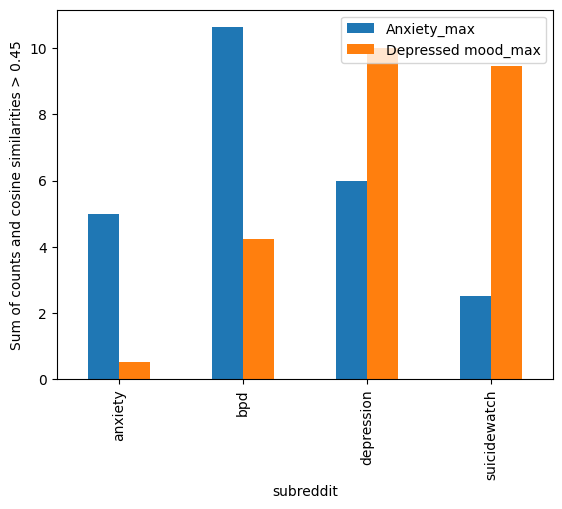

In [33]:
# If below threshold then replace with NaN
threshold = 0.45 # depends on embeddings used
highlight_constructs = ['Anxiety_max', 'Depressed mood_max']
features_threshold = feature_vectors_lc[highlight_constructs]
features_threshold[features_threshold <= threshold] = np.nan
features_threshold['subreddit'] = subreddits

features_threshold[highlight_constructs+['subreddit']].groupby('subreddit').sum().plot.bar()
plt.ylabel(f'Sum of counts and cosine similarities > {threshold}')